In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

Using TensorFlow backend.


In [5]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

# Michael change
#from tensorflow import keras
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.3.0


# Here We Will Work with DB

In [47]:
# The CSV was generated from this query: https://bigquery.cloud.google.com/savedquery/513927984416:c494494324be4a80b1fc55f613abb39c
# The data is also publicly available at this Cloud Storage URL: https://storage.googleapis.com/tensorflow-workshop-examples/stack-overflow-data.csv
data1 = pd.read_csv("stack-overflow-data.csv")

In [61]:
data1.head()

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [48]:
data2 = pd.read_csv("DB/Freelance_stackexange.csv")
data3 = pd.read_csv("DB/StartUp_stackexange.csv")

In [81]:
print(data1.shape)
print(data2.shape)
print(data3.shape)

print(data2.columns)

(40000, 2)
(1494, 4)
(3014, 4)
Index(['Id', 'Title', 'Body', 'Tags'], dtype='object')


In [98]:
tags = set()

data = pd.DataFrame(columns=['Body', 'Tag'])
data.set_index('Body')

# data set one
for body, tag_row in zip(data1.post, data1.tags):
    tags.add(tag_row)
    data = data.append({'Body' : body, 'Tag' : tag}, ignore_index=True)
    
# data set two
for body, tag_row in zip(data2.Body, data2.Tags):
    for tag in (tag_row[1:-1]).split('><'): 
        tags.add(tag)
        data = data.append({'Body' : body, 'Tag' : tag}, ignore_index=True)
        
# data set three
for body, tag_row in zip(data3.Body, data3.Tags):
    for tag in (tag_row[1:-1]).split('><'): 
        tags.add(tag)
        data = data.append({'Body' : body, 'Tag' : tag}, ignore_index=True)

        
print(len(tags))
print(list(tags)[:10])

381
['price', 'patent', 'foreign-incorporation', 'pre-launch', 'small-projects', 'angularjs', 'eu', 'ruby-on-rails', 'importing', 'business-capital']


In [99]:
data.shape

(50761, 2)

In [100]:
data.to_csv('DB/FullDB_v1_with_rep_body.csv')

In [113]:
data.Body[0]

'what is causing this behavior  in our c# datetime type  <pre><code>[test] public void sadness() {    var datetime = datetime.utcnow;    assert.that(datetime  is.equalto(datetime.parse(datetime.tostring()))); } </code></pre>   failed :   <pre><code> expected: 2011-10-31 06:12:44.000  but was:  2011-10-31 06:12:44.350 </code></pre>   i wish to know what is happening behind the scenes in tostring() etc to cause this behavior.    edit after seeing jon s answer :   <pre><code>[test] public void newsadness() {     var datetime = datetime.utcnow;     assert.that(datetime  is.equalto(datetime.parse(datetime.tostring( o )))); } </code></pre>   result :   <pre><code>expected: 2011-10-31 12:03:04.161 but was:  2011-10-31 06:33:04.161 </code></pre>   same result with capital and small  o  . i m reading up the docs  but still unclear.'

# NN learn

In [101]:
# Split data into train and test
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 40608
Test size: 10153


In [102]:
train_posts = data['Body'][:train_size]
train_tags = data['Tag'][:train_size]

test_posts = data['Body'][train_size:]
test_tags = data['Tag'][train_size:]

In [103]:
max_words = 3000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [104]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [105]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

ValueError: y contains new labels: ['83b' 'ab-testing' 'accelerators' 'acquisition' 'affiliate-marketing'
 'agile' 'analytics' 'android-development' 'angel-investors' 'app-store'
 'app-store-optimization' 'applications' 'applying' 'australia' 'b2b'
 'benefits' 'beta-testing' 'billing' 'bizspark' 'board' 'bootstrapping'
 'branch-office' 'brand' 'buisness-model' 'business-capital'
 'business-card' 'business-methodology' 'business-model'
 'business-proposal' 'business-registration' 'business-structure' 'buy-out'
 'c-corporation' 'california' 'cashflow' 'ceo' 'chicken-egg' 'china'
 'churn' 'clients' 'closing' 'cloud' 'co-founder' 'colorado' 'commissions'
 'community' 'company-culture' 'company-management' 'compensation'
 'competition' 'competitive-events' 'content' 'contractors'
 'convertible-note' 'corporation' 'crm' 'crowd-funding' 'cto'
 'customer-development' 'customer-relations' 'customer-service' 'customs'
 'data' 'debt' 'delaware' 'designation' 'director-duties' 'disability'
 'discounts' 'distribution' 'domain-name' 'e-commerce' 'earnings'
 'economics' 'education' 'email-marketing' 'employee-compensation'
 'employees' 'employment' 'enterprise' 'entrepreneurism-abroad'
 'entrepreneurship' 'equity' 'ethics' 'europe' 'exit' 'expansion' 'export'
 'family-business' 'field-sales' 'filing' 'financing' 'forecasting'
 'founder' 'france' 'freelancing' 'fulfilment' 'funding' 'fundraising'
 'game-studio' 'gaming' 'georgia' 'global' 'goals' 'grants' 'hardware'
 'hiring' 'hourly' 'hours' 'human-resources' 'idea' 'importing'
 'incubators' 'india' 'innovation-accounting' 'intellectual-property'
 'international' 'internet' 'interns' 'intrapreneur' 'investment'
 'investors' 'iowa' 'ipo' 'italy' 'iterative-development' 'launch' 'law'
 'lawyer' 'leadership' 'lean' 'lean-startup' 'lean-startup-machine'
 'learning' 'liability-insurance' 'licensing' 'liquidation'
 'local-business' 'logo' 'low-capital' 'ltd' 'ltv' 'maintenance'
 'management' 'market-research' 'market-size' 'marketplace' 'maryland'
 'massachusetts' 'media' 'merchant-services' 'metrics' 'michigan'
 'minimum-viable-product' 'mobile-apps' 'monetization' 'money' 'mvp'
 'naming' 'nda' 'network-effect' 'networking' 'new-hampshire' 'new-york'
 'non-disclosure-agreement' 'non-profit' 'offer' 'online-store'
 'online-tool' 'open-source' 'pakistan' 'paperwork' 'parallel-entrepreneur'
 'partner' 'partners' 'partnership' 'patent' 'pay' 'payment' 'peer-to-peer'
 'penalties' 'pennsylvania' 'pitch' 'pivoting' 'pre-launch' 'pricing'
 'privacy' 'private-company' 'process' 'product' 'product-market-fit'
 'profit-sharing' 'programmers' 'prototyping' 'public-company' 'quotations'
 'referral' 'regression-testing' 'resale' 'resources' 'restaurants'
 'restricted-stock' 'retail' 'retention' 'revenue' 'russia' 's-corporation'
 'saas' 'safety' 'salary' 'seasonal' 'security' 'seed' 'sell' 'seo'
 'servers' 'service' 'shares' 'shipping' 'sickness' 'silicon-valley'
 'singapore' 'skills' 'social-entrepreneurship' 'social-networking'
 'sole-proprietorship' 'south-america' 'spain' 'sri-lanka' 'startup-costs'
 'startup-weekend' 'startups' 'statistics' 'stealth' 'stock'
 'stock-options' 'strategy' 'structure' 'target-market' 'tax'
 'tax-structure' 'team' 'tech-company' 'term-sheet' 'terminology' 'testing'
 'texas' 'trademark' 'umbrella' 'united-kingdom' 'united-states' 'us'
 'us-government' 'user-acquisition' 'user-engagement' 'valuation' 'value'
 'vat' 'venture-capital' 'vesting' 'video' 'vision' 'web-apps' 'website'
 'work-for-hire' 'yc-how-to-start-a-startup' 'yc-startup-school'
 'ycombinator' 'young-entrepreneurs']

In [15]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [20]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (32000, 1000)
x_test shape: (8000, 1000)
y_train shape: (32000, 20)
y_test shape: (8000, 20)


In [21]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 32
epochs = 2

In [22]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 28800 samples, validate on 3200 samples
Epoch 1/2
28800/28800 [==============================] - 18s - loss: 0.9823 - acc: 0.7158 - val_loss: 0.6142 - val_acc: 0.8087
Epoch 2/2
28800/28800 [==============================] - 17s - loss: 0.5527 - acc: 0.8218 - val_loss: 0.5952 - val_acc: 0.8109


In [24]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

7712/8000 [===========================>..] - ETA: 0sTest score: 0.584236462891
Test accuracy: 0.809375


In [27]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label + "\n")  

jquery( tr_selector ) is removing the style values ...
Actual label:jquery
Predicted label: jquery

web reference in wcf  in wcf if we use webreferenc ...
Actual label:.net
Predicted label: asp.net

fragment transaction custom animation - android  i ...
Actual label:android
Predicted label: android

why can i not use the namespace directive in c++ s ...
Actual label:c++
Predicted label: c++

generating password reset link in c# .net  i must  ...
Actual label:.net
Predicted label: c#

php 5.3 $this versus php 5.4  i am calling a membe ...
Actual label:php
Predicted label: php

undefined method `request_uri  actiondispatch  i w ...
Actual label:ruby-on-rails
Predicted label: ruby-on-rails

my table view is not showing data  i am using a ta ...
Actual label:iphone
Predicted label: iphone

update panel not working correctly   i have added  ...
Actual label:asp.net
Predicted label: asp.net

floating objects in html  is it possible to make a ...
Actual label:html
Predicted label: html



In [28]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [29]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

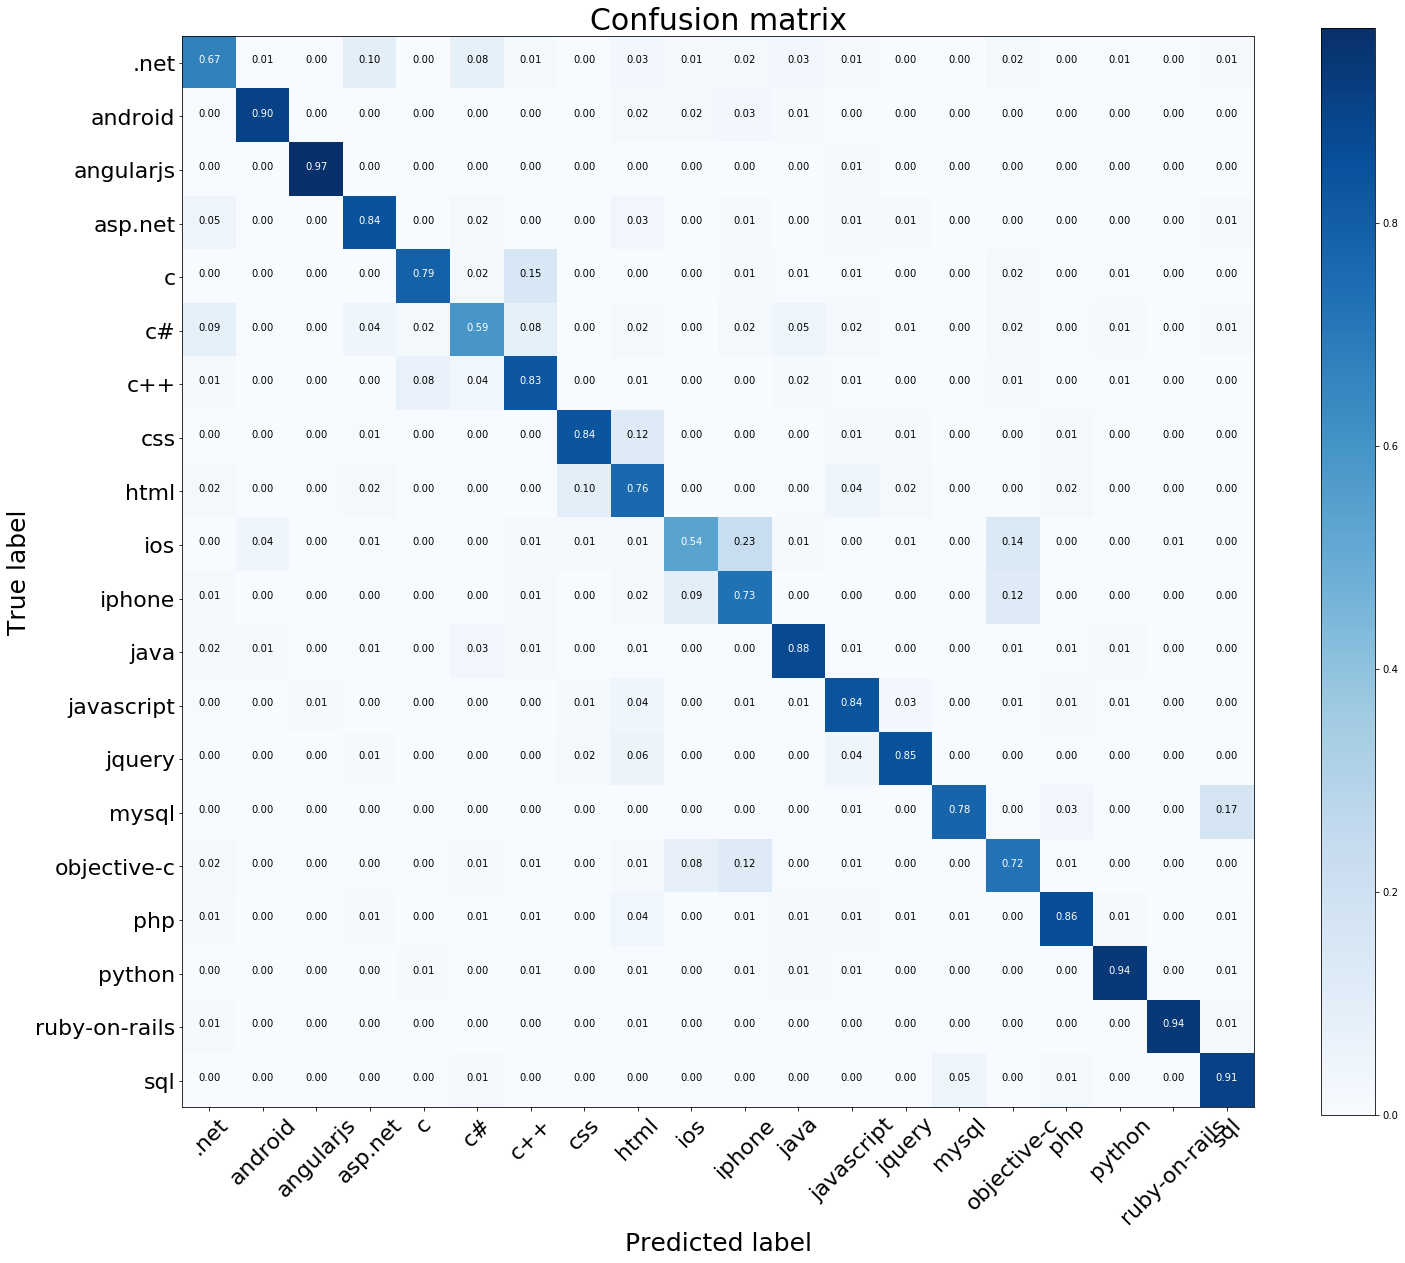

In [30]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()